# Image derivation

In [28]:
import sys
sys.path.append('..')

In [29]:
import numpy
import scipy.signal
import matplotlib.pyplot
import matplotlib.cm
import pathlib
import PIL.Image

In [30]:
matplotlib.pyplot.rcParams.update({'font.size': 22})

## Read image

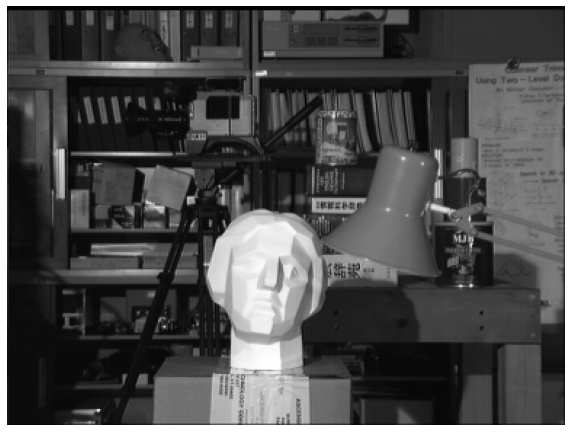

In [31]:
# Open image and convert to grayscale
path: pathlib.Path = pathlib.Path('./images/tsukuba/scene1.row3.col1.ppm')
img = numpy.array(PIL.Image.open(str(path)).convert('L'))

figure = matplotlib.pyplot.figure(figsize=(10, 10))

matplotlib.pyplot.axis('off')
# matplotlib.pyplot.title('Image I')
_ = matplotlib.pyplot.imshow(img, cmap=matplotlib.cm.gray)

### Gaussian function (Point Spread Function)

$\begin{align}
G_{\sigma}(x, y) = \frac{1}{2 \pi \sigma^{2}} e^{-\frac{x^2 + y^2}{2 \sigma^2}}
\end{align}$

### Gradient

#### For x :

$\begin{equation}
\frac{d{G_{\sigma}}}{d{x}}(x, y) 
= -2 \times \frac{x}{2 \sigma^2} \times \frac{1}{2 \pi \sigma^{2}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} \\
= - \frac{x}{\sigma^2} \times G_{\sigma}(x, y) \\
= - \frac{x}{2 \pi \sigma^{4}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} 
\end{equation}$ 

#### For y :

$\begin{equation}
\frac{d{G_{\sigma}}}{d{y}}(x, y) 
= -2 \times \frac{y}{2 \sigma^2} \times \frac{1}{2 \pi \sigma^{2}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} \\
= - \frac{y}{\sigma^2} \times G_{\sigma}(x, y) \\
= - \frac{y}{2 \pi \sigma^{4}} e^{-\frac{x^2 + y^2}{2 \sigma^2}} 
\end{equation}$

$\begin{equation}
\nabla {G_{\sigma}} = \begin{bmatrix}
    \frac{d{G_{\sigma}}}{d{x}}  \\
    \frac{d{G_{\sigma}}}{d{y}}
\end{bmatrix}
\end{equation}$

For an image:

$\begin{equation}
\nabla {I} = \begin{bmatrix}
    \frac{d{I}}{d{x}}  \\
    \frac{d{I}}{d{y}}
\end{bmatrix} = \begin{bmatrix}
    I \ast \frac{d{G_{\sigma}}}{d{x}}  \\
    I \ast \frac{d{G_{\sigma}}}{d{y}}
\end{bmatrix}
\end{equation}$

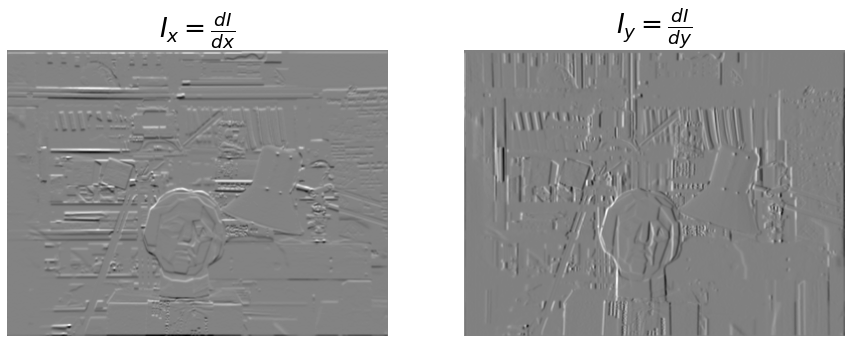

In [32]:
# Compute Gradient

import eagle.gaussian.filter

sigma = numpy.sqrt(2)/2

gradient = eagle.gaussian.filter.gradient(sigma)
img_dx = scipy.signal.convolve2d(img, gradient[0], mode='same')
img_dy = scipy.signal.convolve2d(img, gradient[1], mode='same')
# magnitude=numpy.sqrt(img_dx**2+img_dy**2)

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{x} = \\frac{d{I}}{d{x}}$')
_ = matplotlib.pyplot.imshow(img_dx, cmap=matplotlib.cm.gray)

matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{y} = \\frac{d{I}}{d{y}}$')
_ = matplotlib.pyplot.imshow(img_dy, cmap=matplotlib.cm.gray)

### Hessian

##### En x :

$\begin{align}
\frac{d^2{G_{\sigma}}}{d{x^2}}(x, y) 
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (- \frac{x}{\sigma^2}) \times \frac{d{G_{\sigma}}}{d{x}}(x, y) \\
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (- \frac{x}{\sigma^2}) \times (- \frac{x}{\sigma^2} \times G_{\sigma}(x, y)) \\
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (\frac{x}{\sigma^2})^2 \times G_{\sigma}(x, y) \\
&= (\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) \\
\end{align}$

$\begin{align}
\frac{d^2{G_{\sigma}}}{d{x}d{y}}(x, y)
&= - \frac{y}{\sigma^2} \times \frac{d{G_{\sigma}}}{d{x}}(x, y) \\
&= - \frac{y}{\sigma^2} \times (- \frac{x}{\sigma^2} \times G_{\sigma}(x, y)) \\
&= \frac{x y}{\sigma^4} \times G_{\sigma}(x, y) \\
\end{align}$ 

##### En y :

$\begin{align}
\frac{d^2{G_{\sigma}}}{d{y^2}}(x, y) 
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (- \frac{y}{\sigma^2}) \times \frac{d{G_{\sigma}}}{d{x}}(x, y) \\
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (- \frac{y}{\sigma^2}) \times (- \frac{y}{\sigma^2} \times G_{\sigma}(x, y)) \\
&= (- \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) + (\frac{y}{\sigma^2})^2 \times G_{\sigma}(x, y) \\
&= (\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2}) \times G_{\sigma}(x, y) \\
\end{align}$

$\begin{align}
\frac{d^2{G_{\sigma}}}{d{y}d{x}}(x, y)
&= - \frac{x}{\sigma^2} \times \frac{d{G_{\sigma}}}{d{y}}(x, y) \\
&= - \frac{x}{\sigma^2} \times (- \frac{y}{\sigma^2} \times G_{\sigma}(x, y)) \\
&= \frac{x y}{\sigma^4} \times G_{\sigma}(x, y) \\
&= \frac{d^2{G_{\sigma}}}{d{x}d{y}}(x, y)
\end{align}$

$\begin{equation}
Hess_{G_{\sigma}} = \begin{bmatrix}
    \frac{d^{2}G_{\sigma}}{dxdx} & \frac{d^{2}G_{\sigma}}{dxdy} \\
    \frac{d^{2}G_{\sigma}}{dydx} & \frac{d^{2}G_{\sigma}}{dydy}
\end{bmatrix} = \begin{bmatrix}
    \frac{d^{2}G_{\sigma}}{dx^2} & \frac{d^{2}G_{\sigma}}{dxdy} \\
    \frac{d^{2}G_{\sigma}}{dydx} & \frac{d^{2}G_{\sigma}}{dy^2}
\end{bmatrix}
\end{equation}$

For an image:

$\begin{equation}
Hess_{I} = \begin{bmatrix}
    \frac{d^{2}I}{dx^{2}} & \frac{d^{2}I}{dxdy} \\
    \frac{d^{2}I}{dydx} & \frac{d^{2}I}{dy^{2}}
\end{bmatrix} = \begin{bmatrix}
    I \ast \frac{d^{2}G_{\sigma}}{dx^{2}} & I \ast \frac{d^{2}G_{\sigma}}{dxdy} \\
    I \ast \frac{d^{2}G_{\sigma}}{dydx} & I \ast \frac{d^{2}G_{\sigma}}{dy^{2}}
\end{bmatrix}
\end{equation}$

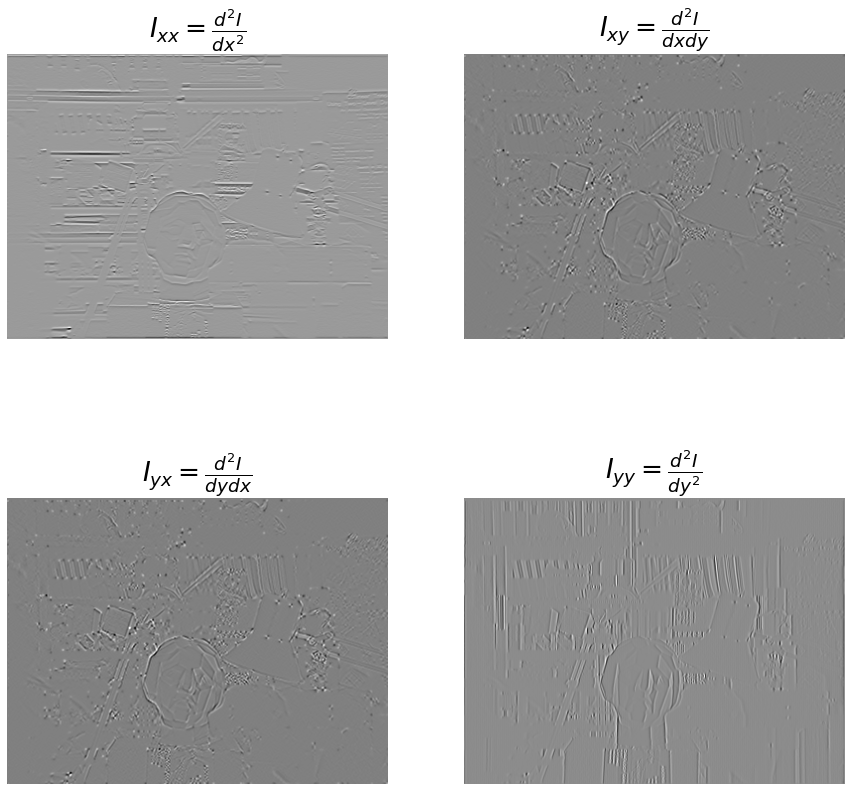

In [33]:
import eagle.gaussian.filter

sigma = numpy.sqrt(2)/2

hessian = eagle.gaussian.filter.hessian(sigma)

img_dxdx = scipy.signal.convolve2d(img, hessian[0, 0], mode='same')
img_dxdy = scipy.signal.convolve2d(img, hessian[0, 1], mode='same')
img_dydx = scipy.signal.convolve2d(img, hessian[1, 0], mode='same')
img_dydy = scipy.signal.convolve2d(img, hessian[1, 1], mode='same')

figure = matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(2, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{xx} = \\frac{d^{2}I}{dx^{2}}$')
_ = matplotlib.pyplot.imshow(img_dxdx, cmap='gray')


matplotlib.pyplot.subplot(2, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{xy} = \\frac{d^{2}I}{dxdy}$')
_ = matplotlib.pyplot.imshow(img_dxdy, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{yx} = \\frac{d^{2}I}{dydx}$')
_ = matplotlib.pyplot.imshow(img_dydx, cmap='gray')


matplotlib.pyplot.subplot(2, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$I_{yy} = \\frac{d^{2}I}{dy^{2}}$')
_ = matplotlib.pyplot.imshow(img_dydy, cmap='gray')